# Calculating $\pi$ using Monte Carlo Method

Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results.

Given that the ratio of their areas is $\pi/4$, the value of $\pi$ can be approximated using a Monte Carlo method:

1. Draw a square, then inscribe a quadrant within it
2. Uniformly scatter a given number of points over the square
3. Count the number of points inside the quadrant, i.e. having a distance from the origin of less than 1
4. The ratio of the inside-count and the total-sample-count is an estimate of the ratio of the two areas, $\pi/4$. Multiply the result by 4 to estimate π.

Ref: https://en.wikipedia.org/wiki/Monte_Carlo_method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MonteCarloEstimation(n):
    # generate n random points
    points = np.random.uniform(0,1, size=(n,2))
    
    # point in circle if satisfy x^2 + y^2 <= 1
    d = np.sum(np.square(points), axis=1) <= 1
    points_in_circle, = np.where(d)
    pi = 4*len(points_in_circle)/n
    return pi

In [8]:
MonteCarloEstimation(10000)

3.124

There are two important considerations:

1. If the points are not uniformly distributed, then the approximation will be poor.
2. There are many points. The approximation is generally poor if only a few points are randomly placed in the whole square. On average, the approximation improves as more points are placed.

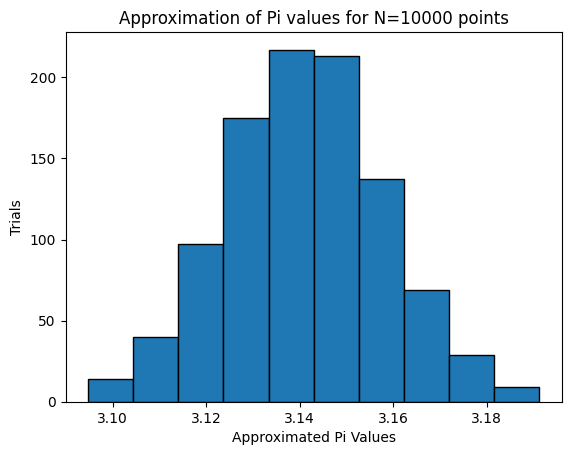

In [4]:
pies=np.array([])
n = 10000
for i in range(1000):
    pies = np.append(pies, MonteCarloEstimation(n))
mu, sigma = np.mean(pies), np.std(pies)
#x = mu + sigma*np.random.randn(10000)
plt.title('Approximation of Pi values for N=10000 points')
n, bins, patches = plt.hist(pies, edgecolor = "black")
plt.xlabel('Approximated Pi Values')
plt.ylabel('Trials')
plt.show()

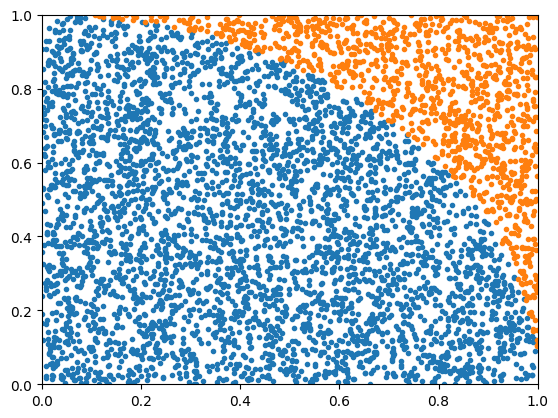

In [5]:
ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))

# some data
points = np.random.uniform(0,1, size=(5000,2))
# point in circle if satisfy x^2 + y^2 <= 1
d = np.sum(np.square(points), axis=1)
points_in = points[np.where(d<=1)[0]]
points_out = points[np.where(d>1)[0]]
ax.plot(points_in[:,0], points_in[:,1], '.')
ax.plot(points_out[:,0], points_out[:,1], '.')